<h1 style="color:#C20A3E;">Project #1</h1>
<h2 style="color:#FF5733;">810100118 - MahdiHajiSeyedHossein</h2>
<h2 style="color:#FF5733;">This project was on search bases and compare BFS-IDS-A*-weighted A* to each other </h2>
<h3 style="color:#FFC300;">The project was about how to find the optimal path to delivery some food to their costumer and there was some trap that the AGENT should discover them and find the best solution for delivery</h3>

In [546]:
from collections import deque
import copy
import ctypes
import numpy as np 
import networkx as nx
import time
import matplotlib.pyplot as plt

In [501]:
class Student :
    def __init__(self , place , fpp , isdel):
        self.place = place 
        self.favPizzaPlace = fpp
        self.isDeliverd = isdel
    
    def __eq__(self, other):
        if isinstance(other, Student):
            return (self.place == other.place) \
                   and (self.favPizzaPlace == other.favPizzaPlace) \
                   and (self.isDelivered == other.isDeliverd)
        return False

    def __hash__(self):
        return hash((self.place, self.favPizzaPlace, self.isDeliverd))

In [502]:
class Edge : 
    def __init__(self , node1 , node2 , laqTime = 0):
        self.nodes = (node1 , node2 , laqTime)

<h2 style="color:#FF5733;">This class saves the graph information and pass them to where needed and save the basic edges and nodes of the 'MAP' </h2>


In [672]:
class Graph :
    def __init__ (self , nodes , edges , graph , laqs , ziraj , students , order ):
        self.nodes = nodes
        self.edges = edges 
        self.graph = graph
        self.laqs = laqs
        self.ziraj = ziraj
        self.students = students
        self.order = order

    def findStudentByRestaurant (self , rest):
        for stu in self.students:
            if stu.favPizzaPlace == rest:
                return (stu.place)
   
    
    def isThereOrderPriority(self , node):
        indexOfStu = int(list(self.students.keys()).index(self.findStudentByRestaurant(node))+1)
        for con in self.order:
            if con[1] == indexOfStu :
                return (True)
        return (False)
    

    def isLaq (self , node1 , node2):
        for i in range(len(self.laqs)):
            if node1 in self.laqs[i][0] and node2 in self.laqs[i][0]:
                return (True , self.laqs[i][2])
        return (False , 0)
    

<h2 style="color:#C20A3E;">The state class save the current information and we should search on ALL POSSIBLE states to find the goal state</h2>
<h2 style="color:#FF5733;">--The initial state is the students' palces and their favorite pizza place </h2>
<h2 style="color:#FF5733;">--The goal state was an state that all pizzas were deliverd and the priority of costumer had been statisfied</h2>
<h2 style="color:#FF5733;">--Every state had some neighbor state that they were possible states to go </h2>

In [1010]:
class State :
    def __init__(self , ziraj , students , order , parent=None):
        self.ziraj = ziraj
        self.pickupPizza = '0'
        self.adjacent = []
        self.parent = parent
        self.students = students
        self.order = order
        self.heuristic = 0
        self.cost = 0
        self.evaluation = 0
        

    def calcHeuristic (self):
        arr = np.array([obj.isDeliverd for obj in self.students])
        self.heuristic = arr.sum()
        
        
    def calcCost(self):
        par = copy.deepcopy(self.parent)
        while par != None:
            par = par.parent
            self.cost += 1
            
    def calcEvaluation(self):
        self.calcCost()
        self.calcHeuristic()
        self.evaluation = self.heuristic + self.cost
        
        
        
    def calcHeuristicWeighted (self , alpha):
        arr = np.array([obj.isDeliverd for obj in self.students])
        self.heuristic = (arr.sum()) * alpha
        

        
        

    def deliverdToStudent(self):
        for s in range(len(self.students)):
            if self.students[s].place == self.ziraj : 
                self.students[s].isDeliverd = True 
                self.pickupPizza = '0'
                break
    
        for con in range(len(self.order)):
            if self.order[con][0] == (s+1) :
                lis = list(self.order[con])
                lis[2] = True
                self.order[con] = tuple(lis)
    
    
    
    def isThereOrderPriority(self , node):
        found = False
        for index in range(len(self.students)):
            if (self.students[index].favPizzaPlace == node):
                found = True
                break
        if found == True :
            for con in self.order:
                if con[1] == (1+index) and con[2] == False:
                    return (True)
            return (False)
        else :
            return (False)
        
        
    
    def isHereRestaurant(self):
        for s in range(len(students)):
            if self.students[s].favPizzaPlace == self.ziraj and self.students[s].isDeliverd == False:
                return True
        return False    
        
                
    def goalTest(self):
        for s in range(len(self.students)):
            if self.students[s].isDeliverd == False:
                return False
        return True
    
    
    def __hash__(self):
        state_tuple = (self.ziraj, tuple(self.students) , self.pickupPizza , tuple(self.order))
        return hash(state_tuple)


    def __eq__(self, other):
        if isinstance(other, State):
            return self.ziraj == other.ziraj \
                and self.pickupPizza == other.pickupPizza \
                and all(self.students[i].isDeliverd == other.students[i].isDeliverd for i in range(len(self.students)))\
                and all(self.order[i][2] == other.order[i][2] for i in range(len(self.order)))
        return False


    
    
    


In [674]:
def parseFile (theFile):
    nodes = set()
    edges = []
    graph = {}
    laqs = []
    ziraj = ''
    students = []
    order = []
    restaurant = []


    f = open(theFile , 'r')
    n , m = map(int , f.readline().split())
    for edge in range(m):

        n1 , n2 = f.readline().split()
        nodes.add(n1)
        nodes.add(n2)
        edges.append((n1 , n2 , 0))

    for edge in edges:        
        if edge[0] not in graph:
            graph[edge[0]] = []
        graph[edge[0]].append(edge[1])

        if edge[1] not in graph:
            graph[edge[1]] = []
        graph[edge[1]].append(edge[0])



    h = int(f.readline())
    for laq in range(h):
        i , xi = map (int , f.readline().split())
        laqs.append([edges[i-1] , i , xi])
        li = list(edges[i-1])
        li[2] = xi
        edges[i-1] = tuple(li)

    ziraj = str(int(f.readline()))

    s = int(f.readline())
    for stu in range(s):
        p , q = f.readline().split()
        students.append(Student(p , q , False))
        


    t = int(f.readline())
    for orde in range(t):
        s1 , s2 = f.readline().split()
        order.append((int(s1) , int(s2) , False ))

    f.close()
    return (nodes , edges , graph , laqs , ziraj , students , order) 


<h2 style="color:#C20A3E;">This function contols some edges that were LAQ</h2>
<h2 style="color:#FF5733;">--***When we want to add a neighbor we check if xi parents before the current has crossed any laqs edges or not***</h2>

In [675]:
def isCrossable (MAP , node1 , node2 , current):
    status , xi = MAP.isLaq(node1 , node2)
    if status == False:
        return True
    else :
        for count in range(xi):
            par = current.parent
            if par != None and par.parent != None:
                tup = (par.ziraj , par.parent.ziraj)
                if node1 in tup and node2 in tup:
                    return False
                par = par.parent
            
    return True

<h2 style="color:#C20A3E;">There were all four possible move :<br>
    -1 : Have a pizza and the current place was the goal costumer.<br>
    -2 : Have a pizza and the current place was not the goal delivery place <br>
    -3 : Don't have any pizza in box and there was a resturant.<br>
    -4 : Don't have any pizza and there was nothing to capture.</h2>

In [676]:
def addNeighbor(MAP , current , visited):
    if current.pickupPizza != '0'and MAP.findStudentByRestaurant(current.pickupPizza) == current.ziraj:
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):
                current.deliverdToStudent()
                new = State(nei , copy.deepcopy(current.students), copy.deepcopy(current.order) , current)
                new.pickupPizza = '0'
                if new not in visited:
                    current.adjacent.append(new)
        
        
    if current.pickupPizza != '0' and MAP.findStudentByRestaurant(current.pickupPizza) != current.ziraj:
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):
                new = State(nei , copy.deepcopy(current.students) ,copy.deepcopy(current.order), current)
                new.pickupPizza = copy.deepcopy(current.pickupPizza)
                if new not in visited:
                    current.adjacent.append(new)


    if current.pickupPizza == '0' and current.isHereRestaurant():
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):
                new = State(nei , copy.deepcopy(current.students),copy.deepcopy(current.order) , current)
                new.pickupPizza = '0'
                if new not in visited:
                    current.adjacent.append(new)

                if current.isThereOrderPriority(current.ziraj)==False:
                    new2 = State(nei , copy.deepcopy(current.students),copy.deepcopy(current.order) , current)
                    new2.pickupPizza = copy.deepcopy(current.ziraj)        
                    if new2 not in visited:
                        current.adjacent.append(new2)

            



            
    if current.pickupPizza == '0' and (current.isHereRestaurant() == False):
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):
                new = State(nei , copy.deepcopy(current.students), copy.deepcopy(current.order) , current )
                new.pickupPizza = '0'
                if new not in visited:
                    current.adjacent.append(new)


            
            
            

In [677]:
def NumDeli(ob):
    count = []
    for s in ob.students :
        if s.isDeliverd == False :
            count += [s.place]
    return count

In [678]:
def printPath(output):
    li = []
    while output:
        li.append(output.ziraj)
        print(output.ziraj, end=' <= ' if output.parent else '')# , output.pickupPizza , NumDeli(output))
        output = output.parent
    return li


In [679]:
def drawGraph(theMap):
    # create a graph
    G = nx.Graph()
    for k, v in theMap.graph.items():
        G.add_edges_from(([(k, t) for t in v]) )

    colo_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    edge_colors = ['red' if (u,v) in colo_edges or (v,u) in colo_edges else 'black' for u,v in G.edges()]

    # draw the graph with edge colors
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    nx.draw_networkx_labels(G, pos)
    plt.show()

<h1 style="color:#C20A3E;">BFS</h1>

In [1110]:
            
def BFS (MAP):
    initial = State(MAP.ziraj ,MAP.students , MAP.order)
    if initial.goalTest() :
        print("Num of Visited:" , len(visited))
        return initial
    
    frontier = deque()
    frontier.append(initial)
    visited = set()
    
    while frontier :
        
        current = frontier.popleft()    
        visited.add(current)
        addNeighbor(MAP , current , visited)

        if current.goalTest():
            print("Num of Visited:" , len(visited))
            return current
        
        #print(current.ziraj , current.pickupPizza , NumDeli(current) , current.order)
        for child in current.adjacent :
            if child not in visited:
                visited.add(child)
                if (child.goalTest()):
                    print("Num of Visited:" , len(visited))
                    return child
                frontier.append(child)
      
    print("Num of Visited:" , len(visited))

In [1111]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test1.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1112]:
theMap.graph

{'4': ['1', '6', '10'],
 '1': ['4', '5', '3', '9', '7'],
 '5': ['9', '1', '10', '3'],
 '9': ['5', '8', '6', '10', '7', '1', '2'],
 '8': ['9', '3', '2'],
 '10': ['5', '6', '2', '9', '4'],
 '6': ['10', '4', '9', '2'],
 '2': ['10', '8', '6', '9'],
 '3': ['8', '5', '1'],
 '7': ['9', '1']}

In [1113]:
for s in theMap.students:
    print(s.place , s.favPizzaPlace)

8 3
10 4
2 7
1 9


In [1114]:
for i in range(0 , 3):
    tic = time.time()
    output = BFS(theMap)
    toc = time.time()
    path = printPath(output)
    print (f" Compute time : {round((toc - tic), 6)}s")


Num of Visited: 238
2 <= 9 <= 7 <= 1 <= 9 <= 8 <= 3 <= 5 <= 10 <= 4 <= 6 Compute time : 0.10439s
Num of Visited: 238
2 <= 9 <= 7 <= 1 <= 9 <= 8 <= 3 <= 5 <= 10 <= 4 <= 6 Compute time : 0.094009s
Num of Visited: 238
2 <= 9 <= 7 <= 1 <= 9 <= 8 <= 3 <= 5 <= 10 <= 4 <= 6 Compute time : 0.085364s


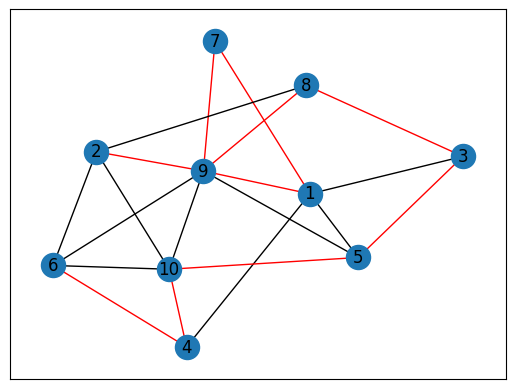

In [1115]:
drawGraph(theMap)

<div class="container">
	<table>
		<thead>
			<tr>
				<th>First Run</th>
				<th>Second Run</th>
				<th>Third Run</th>
                <th>Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0.110404s</td>
				<td>0.085647s</td>
				<td>0.095264s</td>
                <td><b>0.097105s</b></td>
            </tr>
		</tbody>
	</table>
</div>

<b>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [1120]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test2.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1121]:
theMap.graph

{'12': ['15', '3', '6', '13', '14', '7'],
 '15': ['12', '4'],
 '3': ['12', '8', '2', '9', '13', '5'],
 '11': ['8', '10', '14', '5'],
 '8': ['11', '3', '6', '14'],
 '6': ['12', '14', '8', '4'],
 '7': ['14', '2', '12', '4'],
 '14': ['7', '9', '11', '6', '8', '1', '12'],
 '10': ['11', '4'],
 '2': ['3', '5', '13', '7'],
 '5': ['2', '11', '3'],
 '9': ['14', '3', '4'],
 '4': ['15', '10', '9', '6', '7', '13'],
 '13': ['12', '2', '3', '4'],
 '1': ['14']}

In [1122]:
for i in range(0 , 3):
    tic = time.time()
    output = BFS(theMap)
    toc = time.time()
    path = printPath(output)
    print('\n')
    print (f" Compute time : {round((toc - tic), 6)}s")


Num of Visited: 498
13 <= 3 <= 8 <= 11 <= 10 <= 4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14

 Compute time : 0.279129s
Num of Visited: 498
13 <= 3 <= 8 <= 11 <= 10 <= 4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14

 Compute time : 0.228866s
Num of Visited: 498
13 <= 3 <= 8 <= 11 <= 10 <= 4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14

 Compute time : 0.570154s


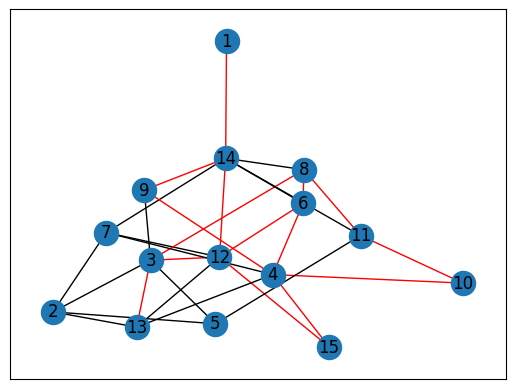

In [696]:
drawGraph(theMap)

<div class="container">
	<table>
		<thead>
			<tr>
				<th>First Run</th>
				<th>Second Run</th>
				<th>Third Run</th>
                <th>Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0.26321s</td>
				<td>0.228546s</td>
				<td>0.237298s</td>
                <td><b>0.243018s</b></td>
            </tr>
		</tbody>
	</table>
</div>

<b>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [1146]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test3.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1147]:
theMap.graph

{'9': ['16', '20', '17', '12', '15', '8', '6'],
 '16': ['9', '12', '5', '14', '17'],
 '5': ['15', '20', '16', '17', '10', '7'],
 '15': ['5', '12', '7', '9', '14'],
 '20': ['5', '9', '8', '2', '13', '4'],
 '14': ['8', '4', '16', '7', '15', '12'],
 '8': ['14', '17', '10', '18', '13', '20', '9'],
 '18': ['2', '4', '8', '10'],
 '2': ['18', '20', '12'],
 '17': ['8', '19', '9', '5', '16'],
 '19': ['17', '11', '3', '13'],
 '12': ['15', '16', '3', '9', '2', '14'],
 '11': ['19'],
 '10': ['8', '5', '13', '18'],
 '4': ['18', '14', '7', '1', '20'],
 '7': ['4', '14', '15', '5'],
 '6': ['13', '9'],
 '13': ['6', '8', '19', '20', '10', '1'],
 '3': ['19', '12'],
 '1': ['4', '13']}

In [1148]:
for i in range(0 , 3):
    tic = time.time()
    output = BFS(theMap)
    toc = time.time()
    path = printPath(output)
    print('\n')
    print (f" Compute time : {round((toc - tic), 6)}s")


Num of Visited: 10157
2 <= 18 <= 8 <= 9 <= 8 <= 10 <= 13 <= 6 <= 13 <= 19 <= 11 <= 19 <= 17 <= 8 <= 13 <= 1 <= 13 <= 20 <= 8 <= 14 <= 16 <= 14 <= 4 <= 18 <= 8 <= 13 <= 19 <= 3 <= 12 <= 15 <= 5 <= 15

 Compute time : 7.9041s
Num of Visited: 10157
2 <= 18 <= 8 <= 9 <= 8 <= 10 <= 13 <= 6 <= 13 <= 19 <= 11 <= 19 <= 17 <= 8 <= 13 <= 1 <= 13 <= 20 <= 8 <= 14 <= 16 <= 14 <= 4 <= 18 <= 8 <= 13 <= 19 <= 3 <= 12 <= 15 <= 5 <= 15

 Compute time : 8.05299s
Num of Visited: 10157
2 <= 18 <= 8 <= 9 <= 8 <= 10 <= 13 <= 6 <= 13 <= 19 <= 11 <= 19 <= 17 <= 8 <= 13 <= 1 <= 13 <= 20 <= 8 <= 14 <= 16 <= 14 <= 4 <= 18 <= 8 <= 13 <= 19 <= 3 <= 12 <= 15 <= 5 <= 15

 Compute time : 7.773544s


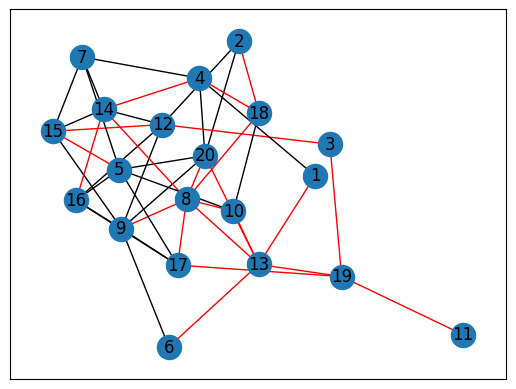

In [1149]:
drawGraph(theMap)

<div class="container">
	<table>
		<thead>
			<tr>
				<th>First Run</th>
				<th>Second Run</th>
				<th>Third Run</th>
                <th>Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>7.73762s</td>
				<td>7.832461s</td>
				<td>7.663302s</td>
                <td><b>7.744461</b></td>
            </tr>
		</tbody>
	</table>
</div>

<b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<h1 style="color:#C20A3E;">IDS (using iterative DFS)</h1>
<h3 style="color:#FFC300;">The diffrences between below function and the above function in BFS is that DFS does NOT save visited nodes . </h3>

In [868]:
def addNeighborDFS(MAP , current):
    
    if current.pickupPizza != '0'and MAP.findStudentByRestaurant(current.pickupPizza) == current.ziraj:
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):
                current.deliverdToStudent()
                new = State(nei , copy.deepcopy(current.students), copy.deepcopy(current.order) , current)
                new.pickupPizza = '0'
                current.adjacent.append(new)

    if current.pickupPizza != '0' and MAP.findStudentByRestaurant(current.pickupPizza) != current.ziraj:
        
        copyOfStu = copy.deepcopy(current.students)
        copyOfOrd = copy.deepcopy(current.order)
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):
                new = State(nei ,copyOfStu  ,copyOfOrd, current)
                new.pickupPizza = copy.deepcopy(current.pickupPizza)
                current.adjacent.append(new)


    if current.pickupPizza == '0' and current.isHereRestaurant():
        
        copyOfStu = copy.deepcopy(current.students)
        copyOfOrd = copy.deepcopy(current.order)
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):

                new = State(nei , copyOfStu,copyOfOrd , current)
                new.pickupPizza = '0'
                current.adjacent.append(new)
                if current.isThereOrderPriority(current.ziraj)==False:
                    new2 = State(nei , copyOfStu,copyOfOrd  , current)
                    new2.pickupPizza = copy.deepcopy(current.ziraj)        
                    current.adjacent.append(new2)

            



            
    if current.pickupPizza == '0' and (current.isHereRestaurant() == False):
        
        copyOfStu = copy.deepcopy(current.students)
        copyOfOrd = copy.deepcopy(current.order)
        for nei in MAP.graph[current.ziraj]:
            if isCrossable(MAP , current.ziraj , nei , current):

                new = State(nei ,copyOfStu,copyOfOrd , current )
                new.pickupPizza = '0'
                current.adjacent.append(new)

            

<h3 style="color:#FFC300;">To detect cycles in DFS, you can keep track of the visited nodes and the parent of each node. If during the DFS traversal you encounter a node that has already been visited and its parent is not the current node, then it indicates a cycle.</h3>

In [869]:
def isCycle (cur):
    par = cur.parent
    while par != None:
        if cur == par:
            return True
        else:
            par = par.parent
    return False

<h4 style="color:#FF5733;">The iterative deepening search algorithm, which repeatedly applies depth- limited search with increasing limits. It terminates when a solution is found or if the depth- limited search returns failure, meaning that no solution exists.</h4>

In [906]:
def IDS(MAP):
    for depth in range(11, 20):
        result = DepthLimited(MAP , depth)
        if result != 'cutoff' :
            return result

<h4 style="color:#FF5733;">When a depth was not useful we will go to the next depth and we will repeat this utility to find the goal state.</h4>

In [907]:
def DepthLimited(MAP , limit):
    initial = State(MAP.ziraj ,MAP.students , MAP.order)
    if initial.goalTest() :
        return initial
    frontier = [(initial , 1)]
    coun = 0
    visited = set()
    
    while frontier:
        current , depth = frontier.pop()
        

        #print(current.ziraj ,NumDeli(current) ,'depth:', depth)
        
        if depth > limit-1:
            continue                
        
        
        visited.add(current)
        
        if current.goalTest():
            return current.parent
        
        
        addNeighborDFS(MAP , current )
        
        for child in current.adjacent :
            if not isCycle(current):
                frontier.append((child, depth + 1))
    return 'cutoff'
        
    

In [961]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/quera.in')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [962]:
theMap.graph

{'1': ['2'], '2': ['1', '3'], '3': ['2', '4', '5'], '4': ['3'], '5': ['3']}

In [963]:
for s in theMap.students:
    print(s.place , s.favPizzaPlace)

4 3
5 2


In [964]:
for i in range(0 , 3):
    tic = time.time()
    output = IDS(theMap)
    toc = time.time()
    path = printPath(output)
    print (f" Compute time : {round((toc - tic), 6)}s")


3 <= 2 <= 3 <= 4 <= 3 <= 5 <= 3 <= 2 <= 1 Compute time : 0.001078s
3 <= 2 <= 3 <= 4 <= 3 <= 5 <= 3 <= 2 <= 1 Compute time : 0.001073s
3 <= 2 <= 3 <= 4 <= 3 <= 5 <= 3 <= 2 <= 1 Compute time : 0.002029s


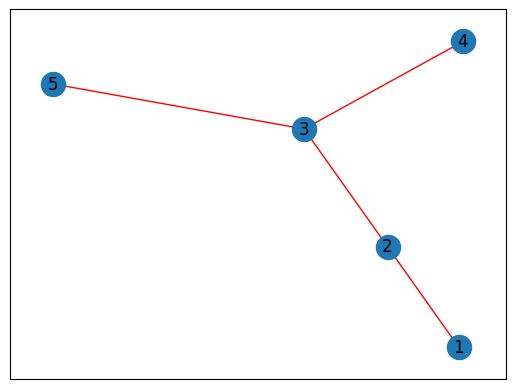

In [965]:
drawGraph(theMap)

<h1 style="color:#C20A3E;">A*</h1>

<h3 style="color:#C20A3E;">The heuristic is the number of undelivered pizzas and I discover it when I relaxed the problem and not consider the priority and laq's edges <b>
    <br><br>Hence, the cost of an optimal solution to a relaxed problem is an admissible heuristic for the original problem.<b><br><br>

<b>Furthermore, because the derived heuristic is an exact cost for the relaxed problem, it must obey the triangle inequality and is therefore consistent <b><br><br>
    
AND THIS HEURISTIC IS TRUE IN TRIANGLE INEQUALITY<b>
</h3>
    
    
  <pre style="color:#FFC300;">refrenced from page 105 in AI russel</pre>

In [1168]:
            
            
            
def chooseMinEvaluation (front):
    var_array = np.array([obj.evaluation for obj in front])
    min_idx = np.argmin(var_array)
    return (front[min_idx])
    
        

In [1169]:
def updateANode (same , child):
    if child.cost < same.cost:
        same.cost = child.cost
        same.parent = child.parent
        same.calcHeuristic()
        same.evaluation = same.cost + same.heuristic
                

In [1170]:
    
def AStar2(MAP):
    openList = []
    closedList = []
    initial = State(MAP.ziraj, MAP.students, MAP.order)
    initial.calcCost()
    initial.calcEvaluation()

    openList.append(initial)
    while openList:
        current = chooseMinEvaluation(openList)
        openList.remove(current)
        
        #print(current.ziraj , current.pickupPizza , NumDeli(current) , current.order)

        if current.goalTest():
            print("Num of visitd:" , len(closedList))
            return current.parent

        addNeighborAStar(MAP, current , closedList)
        for child in current.adjacent:
            child.cost = current.cost +1 
            
            if child in openList:
                same = openList[openList.index(child)]
                
                updateANode (same , child)
                
            elif child in closedList:
                same = closedList[closedList.index(child)]
                if child.cost < same.cost:
                    
                    updateANode (same , child)
                    
                    closedList.remove(same)
                    if child.goalTest():
                        print("Num of visitd:" , len(closedList))
                        return child.parent
                    openList.append(same)
            else:
                child.cost = current.cost + 1
                child.calcHeuristic()
                child.evaluation = child.cost + child.heuristic
                if child.goalTest():
                    print("Num of visitd:" , len(closedList))
                    return child.parent
                openList.append(child)

        closedList.append(current)

        
        

In [1171]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test1.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1172]:
theMap.graph

{'4': ['1', '6', '10'],
 '1': ['4', '5', '3', '9', '7'],
 '5': ['9', '1', '10', '3'],
 '9': ['5', '8', '6', '10', '7', '1', '2'],
 '8': ['9', '3', '2'],
 '10': ['5', '6', '2', '9', '4'],
 '6': ['10', '4', '9', '2'],
 '2': ['10', '8', '6', '9'],
 '3': ['8', '5', '1'],
 '7': ['9', '1']}

In [1173]:
for i in range(0 , 3):
    tic = time.time()
    output = AStar2(theMap)
    toc = time.time()
    path = printPath(output)
    print (f" Compute time : {round((toc - tic), 6)}s")


Num of visitd: 205
8 <= 3 <= 1 <= 9 <= 2 <= 9 <= 7 <= 9 <= 10 <= 4 <= 6 Compute time : 0.212502s
Num of visitd: 205
8 <= 3 <= 1 <= 9 <= 2 <= 9 <= 7 <= 9 <= 10 <= 4 <= 6 Compute time : 0.140326s
Num of visitd: 205
8 <= 3 <= 1 <= 9 <= 2 <= 9 <= 7 <= 9 <= 10 <= 4 <= 6 Compute time : 0.14101s


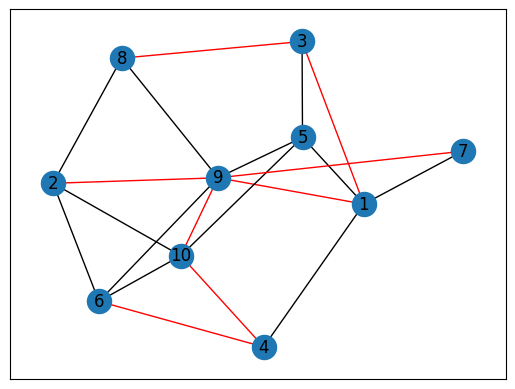

In [1131]:
drawGraph(theMap)

<div class="container">
	<table>
		<thead>
			<tr>
				<th>First Run</th>
				<th>Second Run</th>
				<th>Third Run</th>
                <th>Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0.190048s</td>
				<td>0.171252s</td>
				<td>0.214004s</td>
                <td><b>0.20591667s</b></td>
            </tr>
		</tbody>
	</table>
</div>

<b>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------<b>

In [1132]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test2.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1133]:
theMap.graph

{'12': ['15', '3', '6', '13', '14', '7'],
 '15': ['12', '4'],
 '3': ['12', '8', '2', '9', '13', '5'],
 '11': ['8', '10', '14', '5'],
 '8': ['11', '3', '6', '14'],
 '6': ['12', '14', '8', '4'],
 '7': ['14', '2', '12', '4'],
 '14': ['7', '9', '11', '6', '8', '1', '12'],
 '10': ['11', '4'],
 '2': ['3', '5', '13', '7'],
 '5': ['2', '11', '3'],
 '9': ['14', '3', '4'],
 '4': ['15', '10', '9', '6', '7', '13'],
 '13': ['12', '2', '3', '4'],
 '1': ['14']}

In [1134]:
for i in range(0 , 3):
    tic = time.time()
    output = AStar2(theMap)
    toc = time.time()
    path = printPath(output)
    print (f"\n Compute time : {round((toc - tic), 6)}s")


Num of visitd: 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14
 Compute time : 0.621445s
Num of visitd: 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14
 Compute time : 0.593035s
Num of visitd: 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14
 Compute time : 0.564335s


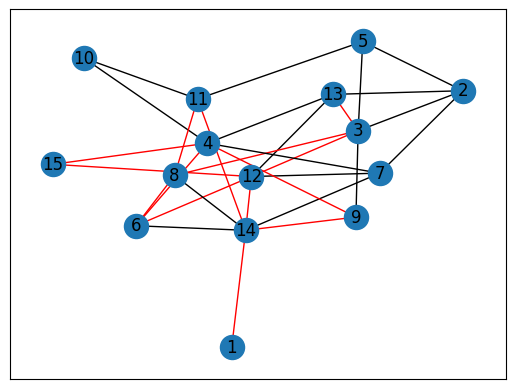

In [994]:
drawGraph(theMap)

<div class="container">
	<table>
		<thead>
			<tr>
				<th>First Run</th>
				<th>Second Run</th>
				<th>Third Run</th>
                <th>Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0.757736s</td>
				<td>0.573522s</td>
				<td>0.550923s</td>
                <td><b>0.627393667s</b></td>
            </tr>
		</tbody>
	</table>
</div>

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------<b>

In [1177]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./newTests//Test3.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1178]:
theMap.graph

{'5': ['10', '6', '1'],
 '10': ['5', '3', '7'],
 '4': ['8', '2', '15'],
 '8': ['4', '6', '3', '11'],
 '12': ['1', '7'],
 '1': ['12', '2', '3', '5'],
 '6': ['11', '5', '8', '14', '15'],
 '11': ['6', '8'],
 '2': ['1', '4', '14', '9'],
 '13': ['7'],
 '7': ['13', '12', '9', '10', '3'],
 '3': ['1', '8', '10', '7'],
 '9': ['14', '7', '2', '15'],
 '14': ['9', '2', '6'],
 '15': ['4', '6', '9']}

In [1179]:
for i in range(0 , 2):
    tic = time.time()
    output = AStar2(theMap)
    toc = time.time()
    path = printPath(output)
    print (f"\n Compute time : {round((toc - tic), 6)}s")



Num of visitd: 464
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11
 Compute time : 0.524507s
Num of visitd: 464
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11
 Compute time : 0.487977s


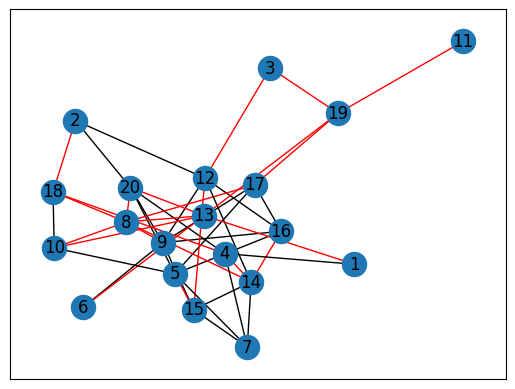

In [1006]:
drawGraph(theMap)

<b>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<h1 style="color:#C20A3E;">Weighted A* with alpha = 1.5</h1>

In [1059]:
alpha = 1.5
def updateANodeW (same , child , alpha):
    if child.cost < same.cost:
        same.cost = child.cost
        same.parent = child.parent
        same.calcHeuristicWeighted(alpha)
        same.evaluation = same.cost + same.heuristic
                

In [1150]:
 
def WeightedAStar2(MAP , alpha):
    openList = []
    closedList = []
    initial = State(MAP.ziraj, MAP.students, MAP.order)
    initial.calcCost()
    initial.calcEvaluation()

    openList.append(initial)
    while openList:
        current = chooseMinEvaluation(openList)
        openList.remove(current)
        
        #print(current.ziraj , current.pickupPizza , NumDeli(current) , current.order)

        if current.goalTest():
            print('num of visited' , len(closedList))
            return current.parent

        addNeighbor(MAP, current , closedList)
        for child in current.adjacent:
            child.cost = current.cost +1 
            
            if child in openList:
                same = openList[openList.index(child)]
                
                updateANodeW (same , child , alpha)
                
            elif child in closedList:
                same = closedList[closedList.index(child)]
                if child.cost < same.cost:
                    
                    updateANodeW (same , child , alpha)
                    
                    closedList.remove(same)
                    if child.goalTest():
                        print('num of visited' , len(closedList))
                        return child.parent
                    openList.append(same)
            else:
                child.cost = current.cost + 1
                child.calcHeuristicWeighted(alpha)
                child.evaluation = child.cost + child.heuristic*10
                if child.goalTest():
                    print('num of visited' , len(closedList))
                    return child.parent
                openList.append(child)

        closedList.append(current)

        
        

In [1151]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test1.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1152]:
for i in range(0 , 3):
    tic = time.time()
    output = WeightedAStar2(theMap , alpha)
    toc = time.time()
    path = printPath(output)
    print (f" Compute time : {round((toc - tic), 6)}s")


num of visited 209
8 <= 3 <= 1 <= 9 <= 2 <= 9 <= 7 <= 9 <= 10 <= 4 <= 6 Compute time : 0.201427s
num of visited 209
8 <= 3 <= 1 <= 9 <= 2 <= 9 <= 7 <= 9 <= 10 <= 4 <= 6 Compute time : 0.166489s
num of visited 209
8 <= 3 <= 1 <= 9 <= 2 <= 9 <= 7 <= 9 <= 10 <= 4 <= 6 Compute time : 0.150201s


<div class="container">
	<table>
		<thead>
			<tr>
				<th>First Run</th>
				<th>Second Run</th>
				<th>Third Run</th>
                <th>Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0.215198s</td>
				<td>0.177453s</td>
				<td>0.175692s</td>
                <td><b>0.183591667s</b></td>
            </tr>
		</tbody>
	</table>
</div>

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [1153]:

nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test2.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

In [1154]:
for i in range(0 , 3):
    tic = time.time()
    output = WeightedAStar2(theMap , alpha)
    toc = time.time()
    path = printPath(output)
    print (f"\n Compute time : {round((toc - tic), 6)}s")


num of visited 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14
 Compute time : 0.585881s
num of visited 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14
 Compute time : 0.530916s
num of visited 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14
 Compute time : 0.547643s


<div class="container">
	<table>
		<thead>
			<tr>
				<th>First Run</th>
				<th>Second Run</th>
				<th>Third Run</th>
                <th>Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0.567452s</td>
				<td>0.594811s</td>
				<td>0.575112s</td>
                <td><b>0.573591667s</b></td>
            </tr>
		</tbody>
	</table>
</div>

<b>------------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [1176]:
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./newTests/Test3.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)
for i in range(0 , 3):
    tic = time.time()
    output = WeightedAStar2(theMap , alpha)
    toc = time.time()
    path = printPath(output)
    print (f"\n Compute time : {round((toc - tic), 6)}s")


num of visited 457
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11
 Compute time : 0.458361s
num of visited 457
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11
 Compute time : 0.45201s
num of visited 457
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11
 Compute time : 0.503874s


<h1 style="color:#C20A3E;">Weighted A* with alpha = 5</h1>

In [ ]:
alpha2 = 5
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test1.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

for i in range(0 , 3):
    tic = time.time()
    output = WeightedAStar2(theMap , alpha2)
    toc = time.time()
    path = printPath(output)
    print (f" Compute time : {round((toc - tic), 6)}s")


In [1145]:
alpha2 = 5
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./tests/Test2.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

for i in range(0 , 3):
    tic = time.time()
    output = WeightedAStar2(theMap , alpha2)
    toc = time.time()
    path = printPath(output)
    print (f" Compute time : {round((toc - tic), 6)}s")


num of visited 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14 Compute time : 0.821247s
num of visited 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14 Compute time : 0.742295s
num of visited 479
4 <= 6 <= 8 <= 6 <= 12 <= 3 <= 13 <= 3 <= 8 <= 11 <= 14 <= 12 <= 14 <= 1 <= 14 <= 12 <= 15 <= 4 <= 9 <= 14 Compute time : 0.618761s


In [1174]:
alpha2 = 5
nodes , edges , graph , laqs , ziraj , students , order = parseFile('./newTests/Test3.txt')
theMap = Graph(nodes , edges , graph , laqs , ziraj , students , order)

for i in range(0 , 3):
    tic = time.time()
    output = WeightedAStar2(theMap , alpha2)
    toc = time.time()
    path = printPath(output)
    print (f" Compute time : {round((toc - tic), 6)}s")


num of visited 457
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11 Compute time : 0.450746s
num of visited 457
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11 Compute time : 0.446308s
num of visited 457
13 <= 7 <= 3 <= 1 <= 3 <= 8 <= 6 <= 14 <= 9 <= 2 <= 1 <= 5 <= 10 <= 7 <= 10 <= 5 <= 6 <= 11 Compute time : 0.473002s


<h1 style="color:#C20A3E;">Conclusions : </h1>
<h3 style="color:#FFC300;">BFS & IDS & A* are optimal but in some weighted , the weigthed A* is not optimal but its much more faster than any other solution. </h3>

<h3>Test 1</h3>
<div class="container">
	<table>
		<thead>
			<tr>
                <th>Algorithm</th>
				<th>States</th>
				<th>Visited</th>
				<th>Time Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
                <td>BFS</td>
				<td>11</td>
				<td>238</td>
				<td>0.097105s</td>
            </tr>
            <tr>
                <td>IDS</td>
				<td>11</td>
				<td>1304</td>
				<td>5.7105s</td>
            </tr>
            <tr>
                <td>A*</td>
				<td>11</td>
				<td>205</td>
				<td>0.14048s</td>
            </tr>
            <tr>
                <td>Weighted A*</td>
				<td>11</td>
				<td>129</td>
				<td>0.15434s</td>
            </tr>
            <tr>
                <td>Weighted A*</td>
				<td>15</td>
				<td>84</td>
				<td>0.11148s</td>
            </tr>
		</tbody>
	</table>
</div>

<h3>Test 2</h3>
<div class="container">
	<table>
		<thead>
			<tr>
                <th>Algorithm</th>
				<th>States</th>
				<th>Visited</th>
				<th>Time Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
                <td>BFS</td>
				<td>20</td>
				<td>498</td>
				<td>0.243018s</td>
            </tr>
            <tr>
                <td>IDS</td>
				<td>-</td>
				<td>-</td>
				<td>-</td>
            </tr>
            <tr>
                <td>A*</td>
				<td>20</td>
				<td>479</td>
				<td>0.56239s</td>
            </tr>
            <tr>
                <td>Weighted A*</td>
				<td>22</td>
				<td>439</td>
				<td>0.369165s</td>
            </tr>
            <tr>
                <td>Weighted A*</td>
				<td>26</td>
				<td>402</td>
				<td>0.221247s</td>
            </tr>
		</tbody>
	</table>
</div>

<h3>Test 3</h3>
<div class="container">
	<table>
		<thead>
			<tr>
                <th>Algorithm</th>
				<th>States</th>
				<th>Visited</th>
				<th>Time Average</th>
			</tr>
		</thead>
		<tbody>
			<tr>
                <td>BFS</td>
				<td>32</td>
				<td>10157</td>
				<td>8.05299s</td>
            </tr>
            <tr>
                <td>IDS</td>
				<td>-</td>
				<td>-</td>
				<td>-</td>
            </tr>
            <tr>
                <td>A*</td>
				<td>32</td>
				<td>464</td>
				<td>0.56239s</td>
            </tr>
            <tr>
                <td>Weighted A*</td>
				<td>34</td>
				<td>429</td>
				<td>0.503874s</td>
            </tr>
            <tr>
                <td>Weighted A*</td>
				<td>39</td>
				<td>302</td>
				<td>0.446308s</td>
            </tr>
		</tbody>
	</table>
</div>

<h1 style="color:#C20A3E;">Referencces :</h1>
<h3 style="color:#FFC300;">--geeksforgeeks </h3>
<h3 style="color:#FFC300;">--Russell' book AI a Moderm Approach </h3>